<a href="https://colab.research.google.com/github/butler-julie/DataScienceForPhysicists2025/blob/main/01_DataExplorationAndVisualization/DataExplorationAndVisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Data Exploration and Visualization

## An Introduction to Data Science with Python Libraries

Author: Julie Butler (University of Mount Union)

Date Created: November 8, 2024

Last Modified: November 8, 2024

Created for the *Short Course on Data Science for Physicists* at the 2025 Global Physics Summit.

Based of the module "[DSECOP 101: Introduction to Data Science Libraries](https://github.com/GDS-Education-Community-of-Practice/DSECOP/tree/main/Intro_to_Data_Science_Libraries)" created for GDS as a part of the [DSECOP fellowship program](https://github.com/GDS-Education-Community-of-Practice/DSECOP).

## Introduction to Data Science Libraries

This notebook will introduce you to four libraries commonly used in data science and help analyze physics data. [Pandas](https://pandas.pydata.org) provide ways to easily import data from a file and save it in something called a [Pandas Dataframe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html), which allows us to easily display the data as a table, access the different columns of data, and begin formatting the data for later analysis. Two of the other libraries introduced in this notebook, [Seaborn](https://seaborn.pydata.org) and [Matplotlib](https://matplotlib.org), are used to create graphs from the data set. Each graphing library has its strengths and reasons to use, which will be discussed later in the notebook.

It maybe easier to think about these libraries by thinking about their relationships to each other.  [NumPy](https://numpy.org), one of the standard Python libraries, provides an implementation of a data structure called [arrays](https://numpy.org/doc/stable/reference/generated/numpy.array.html), which allows us to easily manipulate one and two dimensional data sets.  However, it can be hard to display a matrix of data and extract different column, especially since NumPy does not provide headers for its columns.  Pandas is simply a wrapper for NumPy arrays which provides an easy way to display, access, and manipulate two dimensional data sets. However, underneath the hood it is simply using NumPy arrays.

Likewise, Matplotlib is the simplest graphing library available in Python and its default graphs are quite plain.  Seaborn is a wrapper of the Matplotlib class which adds more formatting to the default graphs and also provides the creation of some compound graphs, such as `pairplot` that we will look at below.

## Introduction to the Data Set

The data set we will investigate in this notebook contains the following data for every measurable [isotope](https://en.wikipedia.org/wiki/Isotope): number of neutrons, number of protons, number of nucleons, [binding energy](https://en.wikipedia.org/wiki/Binding_energy), the uncertainty of binding energy measurement, atomic mass, and uncertainty on mass measurement. This notebook section will help you better understand this data set and why nuclear scientists may want to study it. The data used in this notebook was taken from the [AME2016 atomic mass evaluation](http://nuclearmasses.org/resources_folder/Wang_2017_Chinese_Phys_C_41_030003.pdf).

### Isotopes and Nucleons

The nucleus of an atom contains two types of particles: positively charged particles called **protons** and neutral particles called **neutrons**. The total number of protons in the nucleus is Z, and the total number of neutrons is N. Protons and neutrons are both types of **nucleons**, so the total number of nucleons in the nucleus is A = Z + N.

The number of protons in the nucleus determines what **element** it is. For example, all nuclei with 12 protons are carbon nuclei, all nuclei with 1 proton are hydrogen, and all nuclei with 20 protons are calcium. However, the number of neutrons in a nucleus does not define an element. So there are carbon atoms with 11 neutrons, 12 neutrons, 13 neutrons, and so on. Nuclei that have the same number of protons but different numbers of neutrons are referred to as **isotopes** of each other.

### Atomic Mass

An atom's **atomic mass** is the atom's total mass (i.e., the nucleus and the protons). Note that it is not the same as the sum of the masses of the particles that make up the atom. This will be explored in the next section.

### Binding Energy

The mass of an atomic nucleus will be less than the total mass of its constituent particles. This difference in mass is called the binding energy, as it is the energy required to hold the atom together. Remember that mass and energy are related by the famous equation from Einstein: $E = mc^2$.

To calculate the theoretical binding energies using Einstein's equation, we can define the binding energy as:

$$BE = Mc^2 - mc^2,$$

where M is the total mass of all of the particles in the atom, m is the actual atomic mass of the atom, and c is the speed of light in a vacuum. We can define M as:

$$M = Z(m_p + m_e) + Nm_n,$$

where m$_p$ is the mass of a proton, m$_e$ is the mass of an electron, and m$_n$ is the mass of a neutron. So, we can rewrite the binding energy as:

$$BE = ((m_p + m_e)Z + m_nN - m)c^2.$$

Next, we can define the atomic mass of hydrogen as one proton plus one electron:
$$m_h = m_p + m_e,$$

which means we can rewrite the binding energy as:

$$BE = (m_hZ + m_nN - m)c^2,$$

where $m_h$ = 1.007 MeV, $m_n$ = 1.008 MeV and $c^2$ = 931.49 MeV/u.

The binding energies in the data set are experimental binding energies. Later in this notebook, we will determine how well the experimental binding energies correspond to the theoretical ones we defined in this section.

### Uncertainties

The atomic masses and binding energies in this data set were collected through experiments. Any data collected through experimentation has uncertainty in it. Though these are usually relatively small, they are also presented in this data set.

# Imports
Below is a list of all imports needed to run this notebook. If you are not running this notebook on [Google Colab](https://colab.research.google.com), then you will need to comment out the last section.

In [112]:
# THIRD PARTY IMPORTS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Pandas: Intial Data Exploration and Formatting

### Initial Data Exploration

First, we want to import the data set (stored in a comma separated values file (csv)). There are several ways to do this in Python, but one of the best ways is using the library [Pandas](https://pandas.pydata.org). Pandas will import the data and store it as a [_Pandas Dataframe_](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html), which allows for easy data exploration and formatting. We will use the [`read_csv`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) method to import our data file as a Pandas Dataframe.

In [113]:
# Import the data from a TSV file as a Pandas dataframe
# Note this file is imported directly from the Github page via the URL
nuclear_data = pd.read_csv("https://raw.githubusercontent.com/butler-julie/DataExplorationAndVisualization/main/nuclear_data.tsv",
                           sep="\t")

# Print the DataFrame
# Note that the last time of a code cell will be printed even without a print statement
nuclear_data
# print(nuclear_data)
nuclear_data.head(3)

,N,Z,A,EL,BE,BEd,MASS,MASSd
0,1,0,1,n,0.0,0.0,1008664.91582,0.00049
1,0,1,1,H,0.0,0.0,1007825.03224,0.00009
2,1,1,2,H,1112.283,0.000,2014101.77811,0.00012


In [48]:
# display last 3 items
nuclear_data.tail(3)

,N,Z,A,EL,BE,BEd,MASS,MASSd
3433,177,117,294,Eh,7092#,2#,294210974#,708#
3434,176,118,294,Ei,7079#,2#,294214132#,712#
3435,177,118,295,Ei,7075#,2#,295216332#,692#


The csv file is now formatted as a table (a Pandas Dataframe). This will allow us to easily view, manipulate, and extract the data, both as columns and as rows. The columns from left to right are the number of neutrons, number of protons, number of nucleons (i.e., the total number of protons and neutrons or A = N+Z), the elemental symbol, the binding energy per nucleon, the uncertainty on the binding energy, the atomic mass, and the uncertainty on the atomic mass.

Note that using a print statement will still print the Dataframe as a table, but not quite as nicely formatted.

In [50]:
# Using print instead of making the data frame the last line does
# not format as well
print(nuclear_data)

        N    Z    A  EL        BE    BEd           MASS    MASSd
0       1    0    1   n       0.0    0.0  1008664.91582  0.00049
1       0    1    1   H       0.0    0.0  1007825.03224  0.00009
2       1    1    2   H  1112.283  0.000  2014101.77811  0.00012
3       2    1    3   H  2827.265  0.000  3016049.28199  0.00023
4       1    2    3  He  2572.680  0.000  3016029.32265  0.00022
...   ...  ...  ...  ..       ...    ...            ...      ...
3431  176  117  293  Eh     7095#     3#     293208680#     870#
3432  175  118  293  Ei     7077#     2#     293213498#     753#
3433  177  117  294  Eh     7092#     2#     294210974#     708#
3434  176  118  294  Ei     7079#     2#     294214132#     712#
3435  177  118  295  Ei     7075#     2#     295216332#     692#

[3436 rows x 8 columns]


If we want to just view the first few columns of the data, we can use the [`head()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html) function.

In [51]:
# We can also print just the first few lines if we want to see what is contained in the Dataframe
nuclear_data.head()

,N,Z,A,EL,BE,BEd,MASS,MASSd
0,1,0,1,n,0.0,0.0,1008664.91582,0.00049
1,0,1,1,H,0.0,0.0,1007825.03224,0.00009
2,1,1,2,H,1112.283,0.000,2014101.77811,0.00012
3,2,1,3,H,2827.265,0.000,3016049.28199,0.00023
4,1,2,3,He,2572.680,0.000,3016029.32265,0.00022


There are two ways to access the column labels in a Dataframe. The first is using the [`columns`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.columns.html) variable and the second is using the [`keys`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.keys.html) variable. The first method is more common, but the second way hints at the fact that we will use [dictionary notation](https://docs.python.org/3/tutorial/datastructures.html#dictionaries) to access the different column labels.

In [114]:
nuclear_data.columns  # property

Index(['N', 'Z', 'A', 'EL', 'BE', 'BEd', 'MASS', 'MASSd'], dtype='object')

In [115]:
nuclear_data.keys()  # method

Index(['N', 'Z', 'A', 'EL', 'BE', 'BEd', 'MASS', 'MASSd'], dtype='object')

Next, let's see how many data points are in our data set. We can use the [`shape`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html) variable to get the number of rows and columns in the data set. From there, we can determine the number of values in the Dataframe, either indirectly by multiplying the number of rows by the number of columns, or directly through the [`size`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.size.html) variable.

In [116]:
# Get the number of rows and columns
rows, cols = nuclear_data.shape

print("Rows:", rows)
print("Cols:", cols)

# Two methods for determining the number of values, indirectly through the
# number of rows and columns or through the size variable
print("Number of Values:", rows*cols)
print("Number of Values:", nuclear_data.size)

Rows: 3436
Cols: 8
Number of Values: 27488
Number of Values: 27488


Columns of data can be accessed using the column name and [dictionary formatting](https://docs.python.org/3/tutorial/datastructures.html#dictionaries), where the name of the column is the key for accessing the column of data.

In [117]:
nuclear_data.iloc[-3:][["N","EL","MASS"]]  # reverse indexing

,N,EL,MASS
3433,177,Eh,294210974#
3434,176,Ei,294214132#
3435,177,Ei,295216332#


In [118]:
# Access a column of data
# Same structure as a dictionary
nuclear_data[nuclear_data["EL"]=="He"]

,N,Z,A,EL,BE,BEd,MASS,MASSd
4,1,2,3,He,2572.680,0.000,3016029.32265,0.00022
7,2,2,4,He,7073.915,0.000,4002603.25413,0.00006
10,3,2,5,He,5512.132,4.000,5012057.224,21.470
14,4,2,6,He,4878.519,0.009,6018885.891,0.057
19,5,2,7,He,4123.057,1.080,7027990.654,8.115
23,6,2,8,He,3924.520,0.011,8033934.390,0.095
28,7,2,9,He,3349.037,5.202,9043946.419,50.259
33,8,2,10,He,2995.134,9.285,10052815.308,99.676


Rows of the Dataframe can be accessed using row indexing (just like with lists or Numpy arrays), but you need to use the [`loc`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html) variable with the array indexing.

In [119]:
# Access a row of data
nuclear_data.loc[78]

,78
N,10
Z,7
A,17
EL,N
BE,7286.229
BEd,0.882
MASS,17008448.877
MASSd,16.103


### Adding and Removing Data

The next thing we may want to do we a data set is add or remove data. Let's start by removing the `'A'` column (the total number of nucleons) from the Dataframe. We can do this by using the [`drop`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) function and specifying the name of the column we want dropped from the Dataframe.

**NOTE**: Only run the below cell once, running it more than once will cause an error because the `'A'` column no longer exists in the Dataframe. You can reset your Dataframe if needed by reimporting the data (the first code cell).

In [120]:
# Remove a row from the data frame
print(nuclear_data)
nuclear_data = nuclear_data.drop(columns = ['A'])

print(nuclear_data)

        N    Z    A  EL        BE    BEd           MASS    MASSd
0       1    0    1   n       0.0    0.0  1008664.91582  0.00049
1       0    1    1   H       0.0    0.0  1007825.03224  0.00009
2       1    1    2   H  1112.283  0.000  2014101.77811  0.00012
3       2    1    3   H  2827.265  0.000  3016049.28199  0.00023
4       1    2    3  He  2572.680  0.000  3016029.32265  0.00022
...   ...  ...  ...  ..       ...    ...            ...      ...
3431  176  117  293  Eh     7095#     3#     293208680#     870#
3432  175  118  293  Ei     7077#     2#     293213498#     753#
3433  177  117  294  Eh     7092#     2#     294210974#     708#
3434  176  118  294  Ei     7079#     2#     294214132#     712#
3435  177  118  295  Ei     7075#     2#     295216332#     692#

[3436 rows x 8 columns]
        N    Z  EL        BE    BEd           MASS    MASSd
0       1    0   n       0.0    0.0  1008664.91582  0.00049
1       0    1   H       0.0    0.0  1007825.03224  0.00009
2       1    1 

We can also remove a row of data using the [`drop`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) function and passing it a list of indices to be removed. In the [`drop`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) function `axis=0` corresponds to removing rows at the given indices and `axis=1` will remove columns by index number (an alternative to the above method). The below line of code will drop the last row from the Dataframe.

**Note**: Running this cell more than once will result in more than one row being deleted. If you need to reset the Dataframe, re-import the data from the file.

In [121]:
# Drop a row from the data frame
## CAREFUL EVERYTIME YOU RUN THIS CELL A NEW ROW IS DELETED
print(nuclear_data.shape)

rows, cols = nuclear_data.shape

last_row = nuclear_data.iloc[rows-1]

nuclear_data = nuclear_data.drop([rows-1], axis=0)

print(nuclear_data.shape)

(3436, 7)
(3435, 7)


We can add data to a Dataframe as well. For example, if we decide we do want to have an `"A"` column (the total number of nucleons) in our Dataframe, we can calculate `"A"` as the sum of `"Z"` (the number of protons} and `"N"` (the number of neutrons). We can then use the dictionary style column accessing to add the new column into the Dataframe

In [122]:
# Add a column to the data frame
A = nuclear_data["Z"] + nuclear_data["N"]

nuclear_data["A"] = A

nuclear_data

,N,Z,EL,BE,BEd,MASS,MASSd,A
0,1,0,n,0.0,0.0,1008664.91582,0.00049,1
1,0,1,H,0.0,0.0,1007825.03224,0.00009,1
2,1,1,H,1112.283,0.000,2014101.77811,0.00012,2
3,2,1,H,2827.265,0.000,3016049.28199,0.00023,3
4,1,2,He,2572.680,0.000,3016029.32265,0.00022,3
...,...,...,...,...,...,...,...,...
3430,177,116,Lv,7111#,2#,293204691#,629#,293
3431,176,117,Eh,7095#,3#,293208680#,870#,293
3432,175,118,Ei,7077#,2#,293213498#,753#,293
3433,177,117,Eh,7092#,2#,294210974#,708#,294


We can also add a row to our Dataframe using the [`loc`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html) function. If we want to add that last row back to the Dataframe that we removed a few cells ago, we can use [`loc`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html) to add data to the index corresponding to the current length of the Dataframe. As with lists and Numpy arrays, the last data point's index corresponds to one less than the length, so by passing an index greater than this, we are creating a new row. Note that this behavior is different from lists and Numpy arrays whose length cannot be lengthened by one in this manner.

In [93]:
print(last_row)

N               177
Z               118
EL               Ei
BE            7075#
BEd              2#
MASS     295216332#
MASSd          692#
Name: 3435, dtype: object


In [123]:
print(nuclear_data.shape)

nuclear_data.loc[len(nuclear_data)] = last_row

print(nuclear_data.shape)

(3435, 8)
(3436, 8)


### Statistics

For the columns of numeric data, we can use the [`describe`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) function to generate a quick statistical summary of each column. However, note that when we do this, the only columns of numeric data are the number of neutrons, protons, and nucleons. However, we should have more columns since there is the binding energy, the binding energy uncertainty, the mass, and the mass uncertainty.

In [98]:
## Statistics
nuclear_data.describe()

,N,Z,A
count,3436.000000,3436.000000,3435.000000
mean,82.034051,57.857392,139.846288
std,43.293558,27.809406,70.560046
min,0.000000,0.000000,1.000000
25%,47.000000,36.000000,84.000000
50%,81.000000,58.000000,139.000000
75%,114.000000,80.000000,194.000000
max,177.000000,118.000000,294.000000


In [99]:
nuclear_data.tail()

,N,Z,EL,BE,BEd,MASS,MASSd,A
3431,176,117,Eh,7095#,3#,293208680#,870#,293.0
3432,175,118,Ei,7077#,2#,293213498#,753#,293.0
3433,177,117,Eh,7092#,2#,294210974#,708#,294.0
3434,176,118,Ei,7079#,2#,294214132#,712#,294.0
3435,177,118,Ei,7075#,2#,295216332#,692#,NaN


If you look closely at the binding energy and mass columns, you will notice that some of the entries (especially near the end of the file) have a "#" at the end of the number. This is used to denote values which are determined with interpolation/extrapolation instead of being experimentally measured. This is important to know, but that "#" makes the column into string data instead of numeric data.

There are a few ways to force these columns to be numeric. Let's assume that we only want to keep the experimental values, so we need to remove any entry with a "#". We can use the [`to_numeric`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_numeric.html) function to convert the binding energy, binding energy uncertainty, mass, and mass uncertainty columns to numeric data. If the entry does not have a "#" it will be converted to a number. If the entry contains a number sign, it will be converted into "NAN" (not a number). We can then use the [`dropna`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html) function to remove any row that contains a value (or values) which are NAN.

Doing this on the Dataframe removes about 1,000 entries, leaving us with only numeric values in every column except element name (which should be a string).

In [124]:
print(nuclear_data.shape)

nuclear_data['BE'] = pd.to_numeric(nuclear_data['BE'], errors='coerce')
nuclear_data['BEd'] = pd.to_numeric(nuclear_data['BEd'], errors='coerce')
nuclear_data['MASS'] = pd.to_numeric(nuclear_data['MASS'], errors='coerce')
nuclear_data['MASSd'] = pd.to_numeric(nuclear_data['MASSd'], errors='coerce')

# remove all the theoretically computed data
nuclear_data = nuclear_data.dropna()

print(nuclear_data.shape)

(3436, 8)
(2498, 8)


In [125]:
nuclear_data.tail(10)

,N,Z,EL,BE,BEd,MASS,MASSd,A
3268,154,105,Db,7360.362,0.205,2.591095e+08,56.940,259.0
3276,154,106,Sg,7342.562,0.079,2.601144e+08,22.045,260.0
3281,157,104,Rf,7371.384,0.193,2.611088e+08,54.153,261.0
3283,155,106,Sg,7339.770,0.071,2.611159e+08,19.853,261.0
3290,156,106,Sg,7341.185,0.135,2.621163e+08,38.015,262.0
3305,156,108,Hs,7298.375,0.109,2.641284e+08,31.005,264.0
3311,157,108,Hs,7296.247,0.090,2.651298e+08,25.719,265.0
3318,158,108,Hs,7298.273,0.145,2.661300e+08,41.540,266.0
3339,159,110,Ds,7250.154,0.117,2.691448e+08,33.712,269.0
3345,160,110,Ds,7253.775,0.178,2.701446e+08,51.542,270.0


Now, if we use the [`describe`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) function again, we get a full stastical report over the entire data set.

In [126]:
## Statistics
nuclear_data.describe()

,N,Z,BE,BEd,MASS,MASSd,A
count,2498.000000,2498.000000,2498.000000,2498.000000,2.498000e+03,2498.000000,2498.000000
mean,76.921938,55.147318,8051.281393,0.543048,1.320283e+08,32.813274,132.069255
std,39.514909,25.930144,728.199957,2.721440,6.507395e+07,101.154069,65.057650
min,0.000000,0.000000,0.000000,0.000000,1.007825e+06,0.000000,1.000000
25%,46.000000,35.000000,7819.362250,0.015000,8.191673e+07,1.917250,82.000000
50%,78.000000,56.000000,8184.204000,0.051500,1.339197e+08,7.348000,134.000000
75%,107.000000,78.000000,8450.522500,0.142750,1.839593e+08,21.429500,184.000000
max,160.000000,110.000000,8794.553000,58.903000,2.701446e+08,1435.000000,270.000000


Instead of looking at the full statistical function, we can also use the [`mean`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html), [`max`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.max.html), [`min`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.min.html), etc. function each column of data to extract only the needed statistic. Pandas also includes [many other statistical descriptions](https://pandas.pydata.org/docs/reference/frame.html#computations-descriptive-stats) for the data that are built into the library.

In [127]:
print("The average of the proton numbers:", nuclear_data["Z"].mean())
print("The largest binding energy:", nuclear_data["BE"].max())

The average of the proton numbers: 55.14731785428343
The largest binding energy: 8794.553


The binding energy is given in units of kiloelectron volts (keV) and the mass is given in units of micro-atomic units ($\mu$u). However, for later analysis, it is more convenient to have the binding energy in units of mega-electron volts (MeV) and for the mass to have units of atomic units (u). We can do the unit conversions as shown below, much the same way we would do it for a number or a Numpy array.

**NOTE**: Running the below cell more than once will cause the units of the binding energies and masses to keep changing. You can reset the Dataframe as needed by re-importing the data set.

In [129]:
nuclear_data["BE"] /= 1e3  # convert to MeV from keV
nuclear_data["BEd"] /= 1e3

nuclear_data["MASS"] *= 1e-6
nuclear_data["MASSd"] *= 1e-6

<ipython-input-129-1b0324503e73>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nuclear_data["BE"] /= 1e3  # convert to MeV from keV
<ipython-input-129-1b0324503e73>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nuclear_data["BEd"] /= 1e3
<ipython-input-129-1b0324503e73>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

Now a final check to make sure our binding energies and masses are in the approporiate units.


In [130]:
nuclear_data.describe()

,N,Z,BE,BEd,MASS,MASSd,A
count,2498.000000,2498.000000,2498.000000,2.498000e+03,2498.000000,2.498000e+03,2498.000000
mean,76.921938,55.147318,0.008051,5.430476e-07,0.000132,3.281327e-11,132.069255
std,39.514909,25.930144,0.000728,2.721440e-06,0.000065,1.011541e-10,65.057650
min,0.000000,0.000000,0.000000,0.000000e+00,0.000001,0.000000e+00,1.000000
25%,46.000000,35.000000,0.007819,1.500000e-08,0.000082,1.917250e-12,82.000000
50%,78.000000,56.000000,0.008184,5.150000e-08,0.000134,7.348000e-12,134.000000
75%,107.000000,78.000000,0.008451,1.427500e-07,0.000184,2.142950e-11,184.000000
max,160.000000,110.000000,0.008795,5.890300e-05,0.000270,1.435000e-09,270.000000


### Masks (Sub-Dataframes)

As a final topic related to the Pandas library we will be looking at creating [masks](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mask.html), or a sub-Dataframe. It is quite common to only need part of a data set, subject to some conditions. In the example below, we only want those nuclei which have fewer than 60 nucleons.

We can create a sub-Dataframe by applying a mask to the original Dataframe. The mask is a statement which will evaluate to true or false for each row of the Dataframe (known as a [boolean expression](https://codehs.com/tutorial/evelyn/boolean-expressions-in-python)), and only rows which result in a true value will be returned. The mask is passed to the original Dataframe using square brackets and the sub-Dataframe is returned. Note the original Dataframe is not changed during this process.

In [136]:
nuclear_data_A_below_60 = nuclear_data[nuclear_data["A"] < 60]
nuclear_data_A_below_26 = nuclear_data[nuclear_data["A"] < 26]
nuclear_data_A_below_60.shape

(420, 8)

## Seaborn: Plotting Straight from a Pandas Dataframe

The first plotting library we will look at is called [Seaborn](https://seaborn.pydata.org). Seaborn is actually a wrapper for the second plotting library we will explore ([Matplotlib](https://matplotlib.org)) and it integrates well with [Pandas](https://pandas.pydata.org) as it can plot data directly from a [Dataframe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html).

### Pairplot

One of the most common plots to make using the Seaborn library is the [`pairplot`](https://seaborn.pydata.org/generated/seaborn.pairplot.html), which takes a Dataframe and plots each column against every other column. These types of plots are useful for finding correlations in the data. Note that for a large Dataframe (such as this one) the [`pairplot`](https://seaborn.pydata.org/generated/seaborn.pairplot.html) may take awhile to generate so be patient!

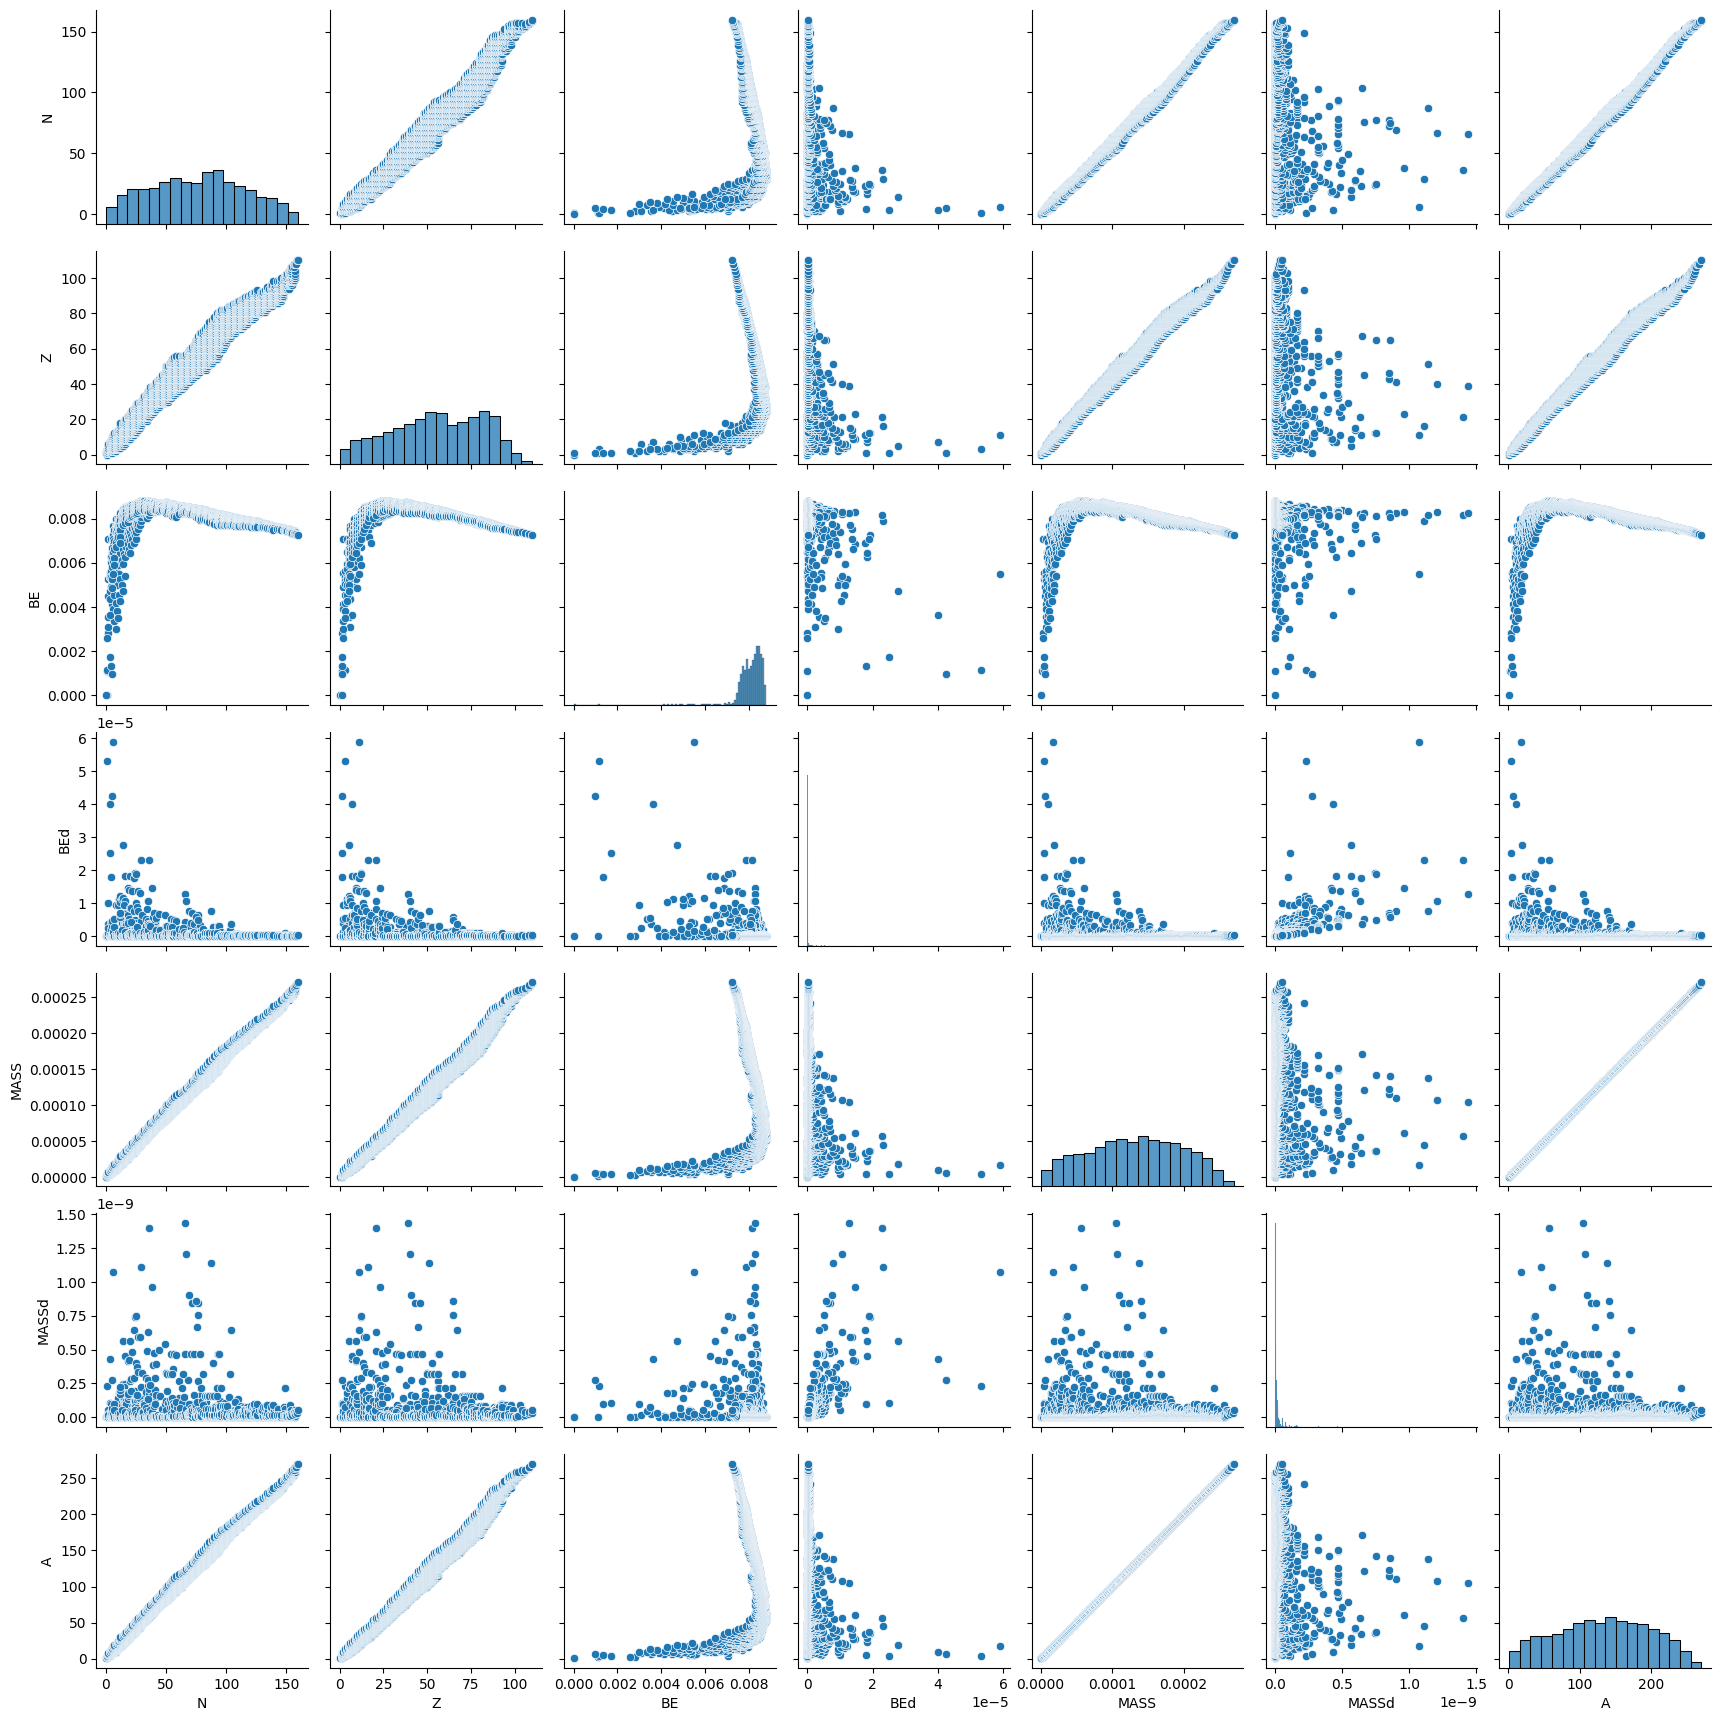

In [135]:
sns.pairplot(nuclear_data)

We can color code the [`pairplot`](https://seaborn.pydata.org/generated/seaborn.pairplot.html) by passing a column name to the `hue` argument. Here we are using the smaller Dataframe we made using a mask and setting the `hue` equal to the `"EL"` column, which corresponds to the element name. So now we have a [`pairplot`](https://seaborn.pydata.org/generated/seaborn.pairplot.html) showing all of the correlations in your data, color coded by the element name. Note that Seaborn automatically adds a legend on the side.

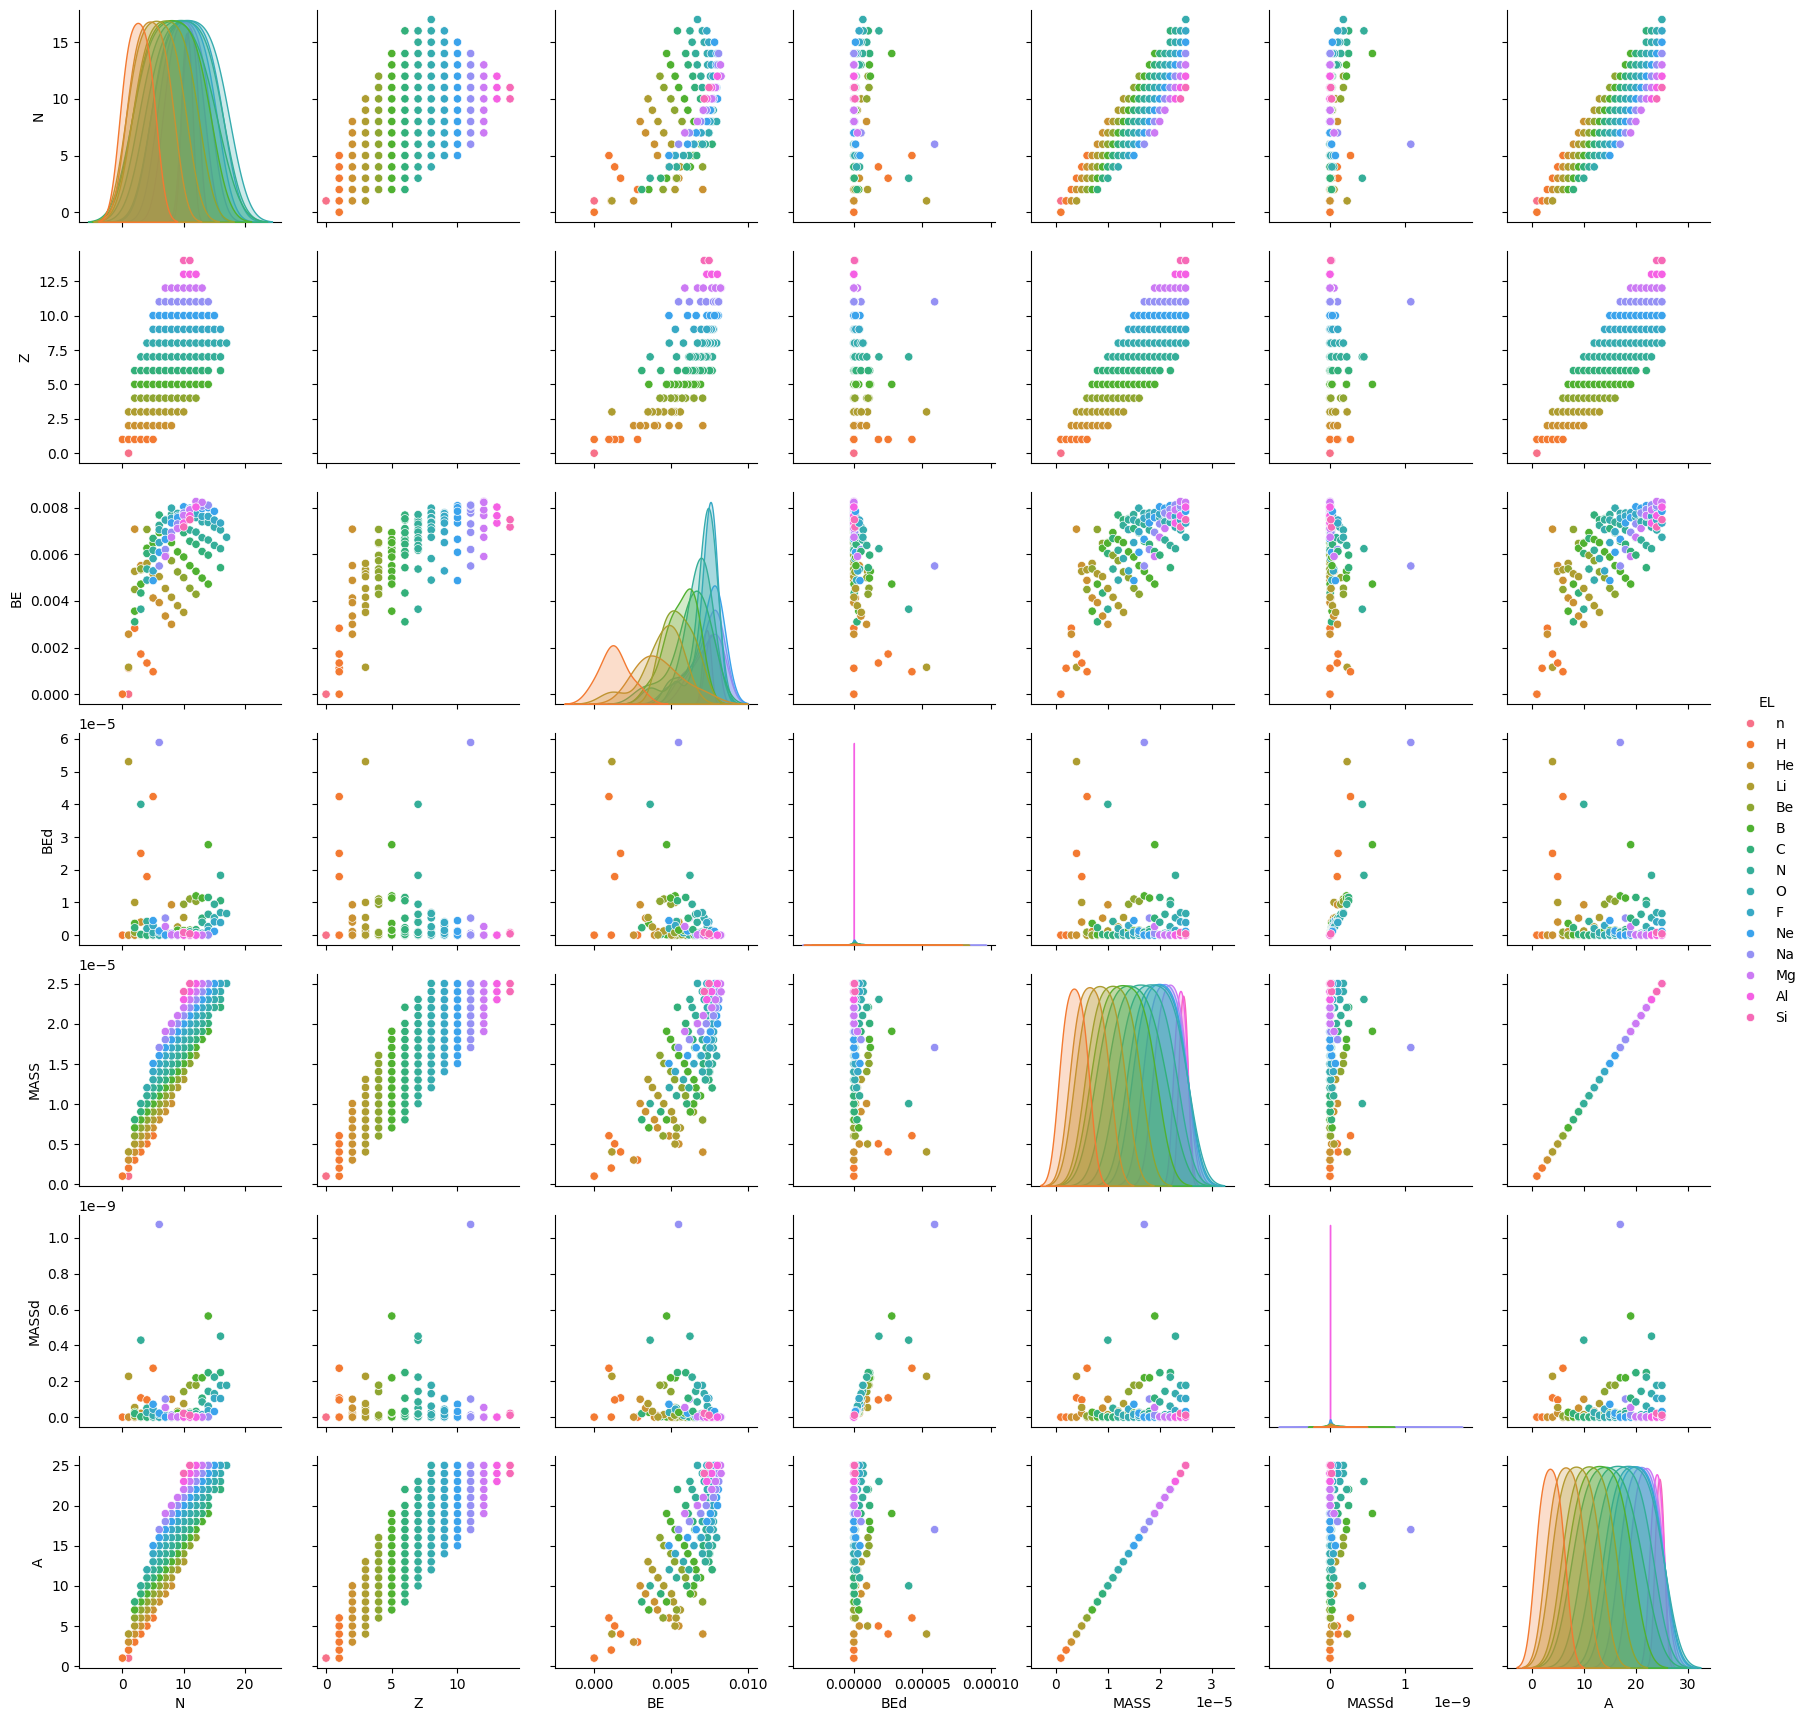

In [137]:
sns.pairplot(nuclear_data_A_below_26, hue="EL")

### Other Plot Styles

Seaborn does provide the ability to create single plots as well, using a Pandas Dataframe. There are [many different built in plots](https://seaborn.pydata.org/examples/index.html) in Seaborn for creating data visualizations directly from a Dataframe, however, many of them will not apply to the data set we are looking at here (a [bar plot](https://seaborn.pydata.org/generated/seaborn.barplot.html) for example). However, creating a [scatter plot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) of the binding energy per nucleon as a function of the number of nucleons is a useful plot we will be looking at for the remainder of this notebook.

Below is an example of a scatter plot created using Seaborn's [`scatterplot`](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) and a Pandas Dataframe. The arguments `x` and `y` are the names of the columns from the Dataframe to be plotted on the x and y axes. Here, we want to plot the number of nucleons (A) on the x axis and the binding energy (BE) on the y axis. Note that the axes labels are automatically added in when the plot is created.

<Axes: xlabel='A', ylabel='BE'>

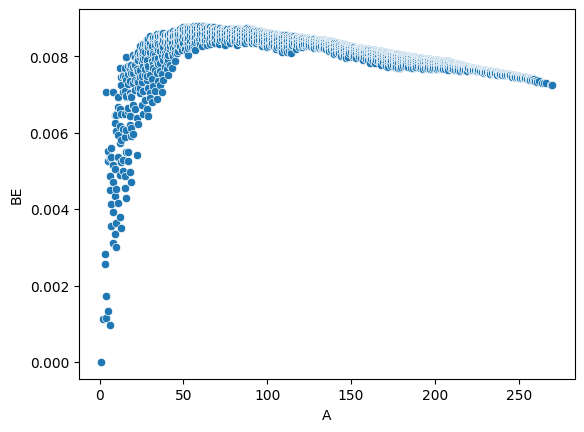

In [138]:
sns.scatterplot(nuclear_data, x='A', y='BE')

Note, that Pandas also has built in plotting available through the [`plot module`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot). We can create a scatter plot using the [`scatter`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.scatter.html#pandas.DataFrame.plot.scatter) function which looks very similar to Seaborn plot. Both Seaborn and the Panda's plotting capabilities are based on the Matplotlib library we will explore later in this tutorial.

<Axes: xlabel='A', ylabel='BE'>

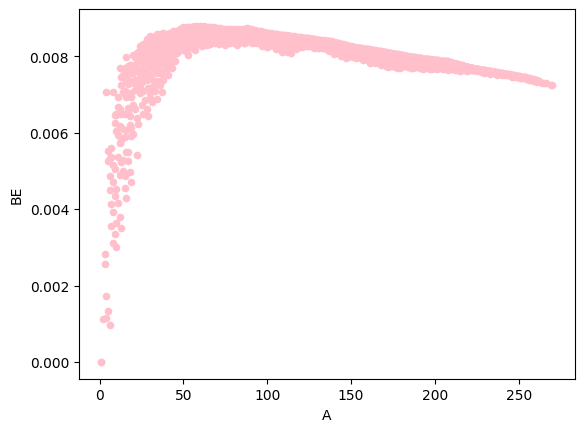

In [142]:
nuclear_data.plot.scatter("A","BE", color='pink')

For now, let's focus on the Seaborn scatter plot, but it is useful to keep the Pandas plotting capabilities in mind to create quick plots during the data exploration process without needing additional imports.

To begin customizing our [Seaborn scatter plot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html), let's set the x and y axes labels. All Seaborn plots return an instance of the [Matplotlib Axes class](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.html#matplotlib.axes.Axes) which allows to change any of the properties specified under "\*\*kwargs" using the `.set` function.

[Text(0.5, 0, 'Number of Nucleons'),
 Text(0, 0.5, 'Binding Energy Per Nucleon (MeV)')]

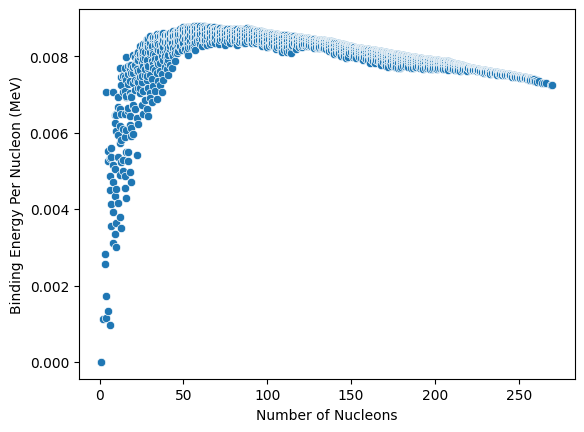

In [143]:
s = sns.scatterplot(nuclear_data, x='A', y='BE')
s.set(xlabel='Number of Nucleons', ylabel='Binding Energy Per Nucleon (MeV)')

We can change the marker style for each of the points using the `marker` argument and a string containing one of the [marker types](https://matplotlib.org/stable/api/markers_api.html) defined by Matplotlib.

[Text(0.5, 0, 'Number of Nucleons'),
 Text(0, 0.5, 'Binding Energy Per Nucleon (MeV)')]

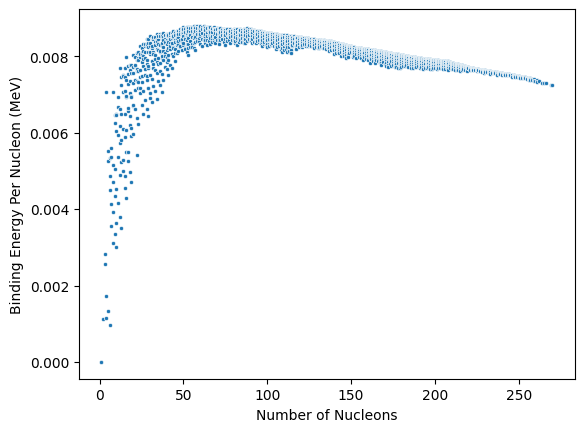

In [148]:
s = sns.scatterplot(nuclear_data, x='A', y='BE', marker='.')
s.set(xlabel='Number of Nucleons', ylabel='Binding Energy Per Nucleon (MeV)')

### Two-Dimensional Plotting With Heatmaps

We can also use Seaborn for two-dimensional plotting. In this section we will use a two-dimensional plot called a [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) to create a model for the [table of nuclides](https://en.wikipedia.org/wiki/Table_of_nuclides). Heatmaps are useful for displaying matrices as well as data which depends on two input variables. In our case, we can think of the binding energy of a nucleus as depending on both the number of protons and the number of neutrons in the nucleus.

First, we must make our binding energies two dimensional using the below code. If your data is stored in a two dimensional fashion in a Dataframe, you can pass the Dataframe directly to the [`heatmap`](https://seaborn.pydata.org/generated/seaborn.heatmap.html) function.

In [150]:
# Extract the relevant columns of data
Z = np.asarray(nuclear_data["Z"])
N = np.asarray(nuclear_data["N"])
BE = np.asarray(nuclear_data["BE"])

# Relate each binding energy to its corresponding number of protons and neutrons
BE_dict = {}
for i in range(len(N)):
    BE = np.asarray(BE)
    value = [Z[i], N[i]]
    BE_dict[BE[i]] = value

# Create a two dimensional array which will hold the binding energies
BE_2D = np.zeros((np.max(Z)+1,np.max(N)+1))

# Fill the two dimensional array with binding energies such that each row has the same number of
# protons and each column has the same number of neutrons
for i in range(len(BE)):
    z,n = BE_dict[BE[i]]
    BE_2D[z][n] = BE[i]

Now we can use the [`heatmap`](https://seaborn.pydata.org/generated/seaborn.heatmap.html) function from Seaborn to create a two-dimensional representation of the binding energies.

<Axes: >

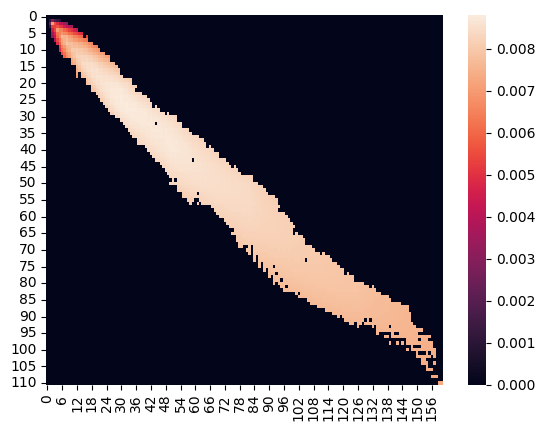

In [152]:
sns.heatmap(BE_2D)

Typically, we want the point corresponding to zero neutrons and zero protons to be the bottom-left corner, so let's invert the y-axis to achieve this. We will use the returned instances of [Matplotlib's Axes class](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.html#matplotlib.axes.Axes) and the [`invert_yaxis`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.invert_yaxis.html) function.

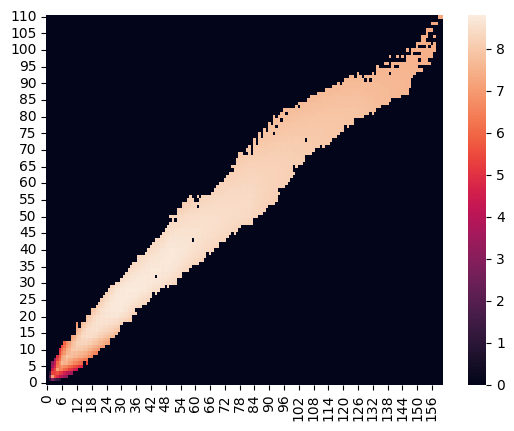

In [ ]:
ax = sns.heatmap(BE_2D)
ax.invert_yaxis()

As a final step, let's change the color (using the name of a [Matplotlib colormap](https://matplotlib.org/stable/gallery/color/colormap_reference.html)) and add axes labels to our table of nuclides.

[Text(0.5, 23.52222222222222, 'Number of Protons'),
 Text(50.722222222222214, 0.5, 'Number of Neutrons')]

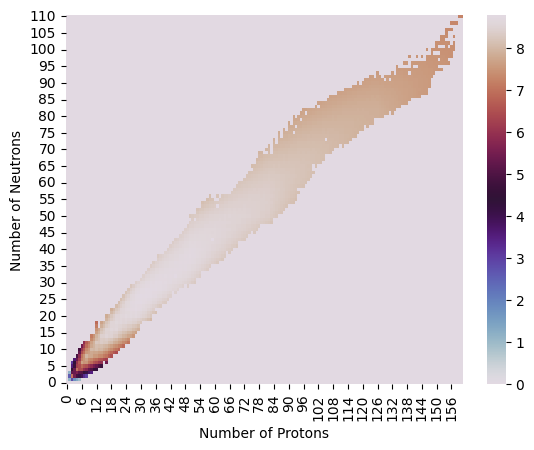

In [ ]:
s = sns.heatmap(BE_2D, cmap="twilight")
s.invert_yaxis()
s.set(xlabel='Number of Protons', ylabel='Number of Neutrons')

We can also create a more zoomed in version of this graph using the masked Dataframe we created in the Pandas section of this tutorial which only contained data with less than 60 nucleons.

[Text(0.5, 23.52222222222222, 'Number of Protons'),
 Text(50.722222222222214, 0.5, 'Number of Neutrons')]

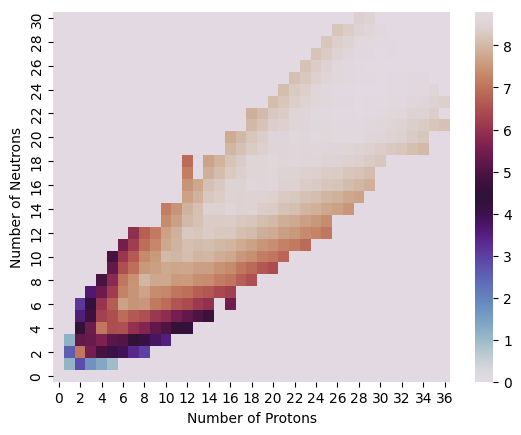

In [ ]:
A = np.asarray(nuclear_data_A_below_60["A"])
Z = np.asarray(nuclear_data_A_below_60["Z"])
N = np.asarray(nuclear_data_A_below_60["N"])
BE = np.asarray(nuclear_data_A_below_60["BE"])

BE_dict = {}
for i in range(len(N)):
    BE = np.asarray(BE)
    value = [Z[i], N[i]]
    BE_dict[BE[i]] = value

BE_2D = np.zeros((np.max(Z)+1,np.max(N)+1))

for i in range(len(BE)):
    z,n = BE_dict[BE[i]]
    BE_2D[z][n] = BE[i]

z = BE_2D
nrows, ncols = BE_2D.shape
Z_2D = np.linspace(np.min(Z), np.max(Z), ncols)
N_2D = np.linspace(np.min(N), np.max(N), nrows)
Z_2D, N_2D = np.meshgrid(Z_2D, N_2D)

s = sns.heatmap(BE_2D, cmap="twilight")
s.invert_yaxis()
s.set(xlabel='Number of Protons', ylabel='Number of Neutrons')

## Matplotlib: Creating More Customized Graphs and Plots

While [Seaborn](https://seaborn.pydata.org) does create plots that look nice with only a line of code (and they can use data stored in a Dataframe), Seaborn lacks the customization that is available in [Matplotlib](https://matplotlib.org). In this section of the tutorial we will look at creating a [scatter plot with Matplotlib](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html), customize how the plot looks, add axes labels, add error bars, and add a legend. There are [many different types of plots in Matplotlib](https://matplotlib.org/stable/plot_types/index.html) that can be created using a similar format to what we will use here of the scatter plot.

### Creating a Scatterplot with Labels, Error Bars, and a Legend

When creating a scatter plot in Matplotlib, we can use the [`scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) function and then pass it the data we want plotted on the x axis and the data we want plotted on the y axis. Matplotlib does not handle full [Dataframes](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) as well as Seaborn, so we need to specifically pass only the columns we want as the x and y data.

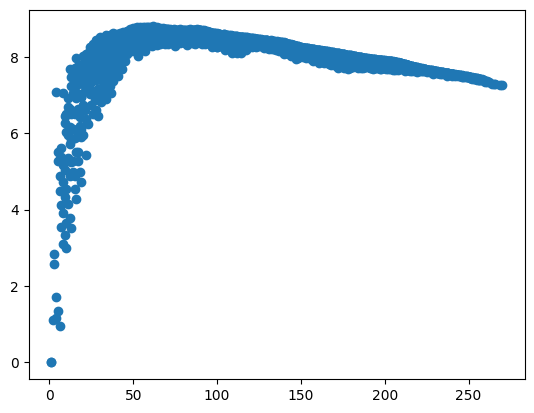

In [ ]:
plt.scatter(nuclear_data["A"],nuclear_data["BE"])

Let's extract the data columns we want to use in this plot from the Dataframe. Note than when we do this both of the columns are extracted as a [Pandas Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html), which will work well with Matplotlib.

In [ ]:
A = nuclear_data["A"]
BE = nuclear_data["BE"]
type(A)

pandas.core.series.Series

Creating a scatter plot with these extracted data sets and the [`scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) function looks a bit cleaner than the previous version.

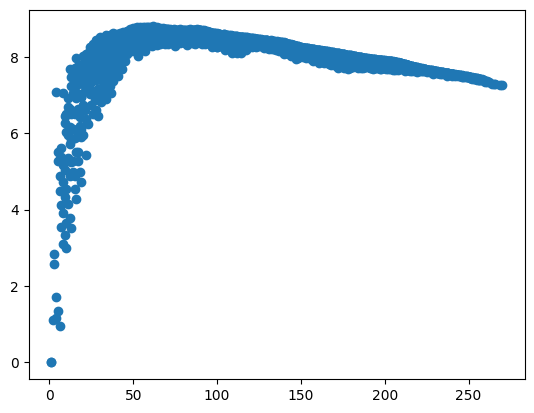

In [ ]:
plt.scatter(A,BE)

As a first step to making this a publication ready graph, let's add x and y axes labels using the [`xlabel`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlabel.html) and [`ylabel`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylabel.html) functions. For each of these functions we pass a string to be used as the axes label and we use the `fontsize` argument to make the text slightly larger than the default. A larger value for `fontsize` will increase the size of the axes labels and a smaller value will decrease the size.

Text(0, 0.5, 'Binding Energy Per Nucleon (MeV)')

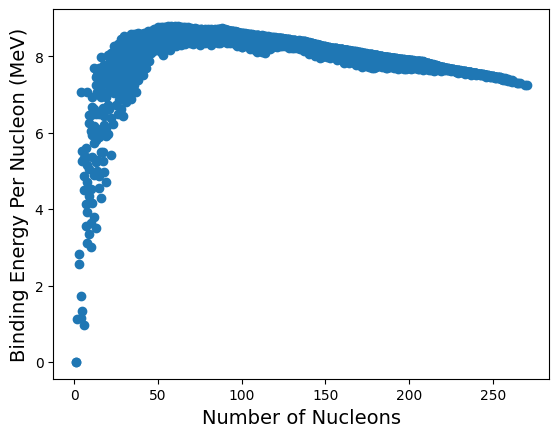

In [ ]:
plt.scatter(A,BE)
plt.xlabel("Number of Nucleons", fontsize=14)
plt.ylabel("Binding Energy Per Nucleon (MeV)", fontsize=14)

Since we have so many data points, the graph is pretty crowded. Let's use the `s` argument to the [`scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) function to decrease the size of each marker. `s` is a number whose value corresponds to the relative size of each of the markers (larger values for `s` correspond the larger markers).

Text(0, 0.5, 'Binding Energy Per Nucleon (MeV)')

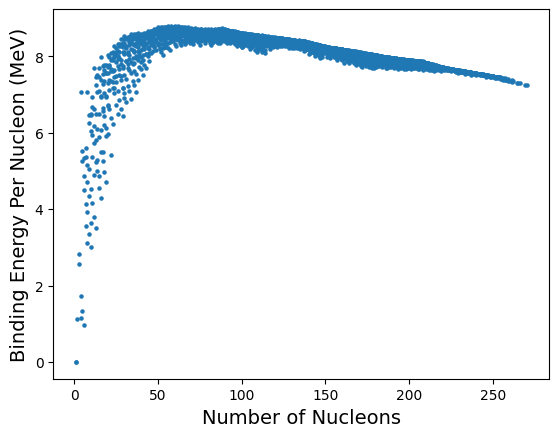

In [ ]:
plt.scatter(A,BE,s=5)
plt.xlabel("Number of Nucleons", fontsize=14)
plt.ylabel("Binding Energy Per Nucleon (MeV)", fontsize=14)

We can use the `marker` argument to change the shape of the markers (in this case to a triangle). There are [many different marker styles](https://matplotlib.org/stable/api/markers_api.html) supported by Matplotlib and you can use multiple marker styles on one plot with different data sets (seen towards the end of this notebook).

Text(0, 0.5, 'Binding Energy Per Nucleon (MeV)')

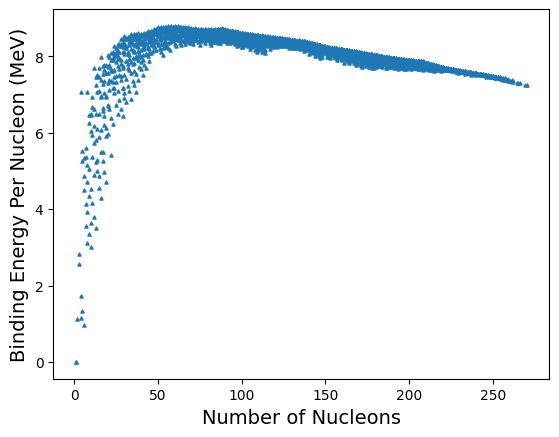

In [ ]:
plt.scatter(A,BE,s=5, marker="^")
plt.xlabel("Number of Nucleons", fontsize=14)
plt.ylabel("Binding Energy Per Nucleon (MeV)", fontsize=14)

We can also change the color of the data points using the `color` argument and any one of the [many colors supported by Matplotlib](https://matplotlib.org/stable/gallery/color/named_colors.html).

Text(0, 0.5, 'Binding Energy Per Nucleon (MeV)')

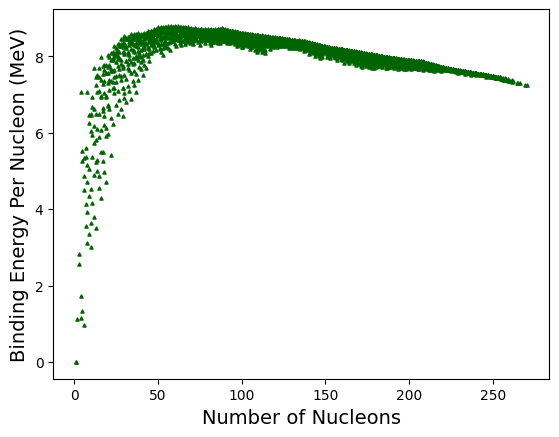

In [ ]:
plt.scatter(A,BE,s=5, marker="^", color="darkgreen")
plt.xlabel("Number of Nucleons", fontsize=14)

plt.ylabel("Binding Energy Per Nucleon (MeV)", fontsize=14)

Next, we may want to add error bars to our data set. Our binding energies do have uncertainties with them so we could use the [`fill_between`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.fill_between.html) function to create a shaded region which shows the uncertainty on our binding energies. In the [`fill_between`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.fill_between.html) function we have to use the [`ravel`](https://numpy.org/doc/stable/reference/generated/numpy.ravel.html) function on the x data set (A in this case), and then we pass the lower bounds for the shaded region (the binding energies minus their uncertainties) and then the upper bounds for the shaded region (the binding energies plus their uncertainties). The `color` argument sets the color of the uncertainty band to match the data set and the `alpha` arguments sets the transparency of the shaded region (0.0 is entirely transparent and 1.0 is entirely opaque.

Note that you can use the [`errorbar`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html) function to make a more traditional scatter plot or line plot with error bars, but because we have so much data here, the error bars will look quite crowded.

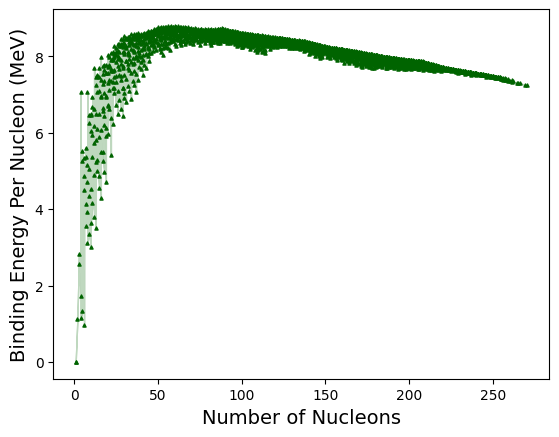

In [ ]:
BE_uncertainity = nuclear_data["BEd"]

plt.scatter(A,BE,s=5, marker="^", color="darkgreen")
plt.xlabel("Number of Nucleons", fontsize=14)
plt.ylabel("Binding Energy Per Nucleon (MeV)", fontsize=14)

plt.fill_between(A.ravel(),BE - BE_uncertainity,
    BE+ BE_uncertainity, color="darkgreen", alpha=0.25)

Unfortunately for us (but fortunately for nuclear physicists) the error on the experimental binding energies is quite small, so it is hard to see our uncertainties, except at the lower values where the data is more sparse. For the sake of learning how to plot an uncertainty band, let's create some fake uncertainties on our data so we can see a nice uncertainty band over the entire data set.

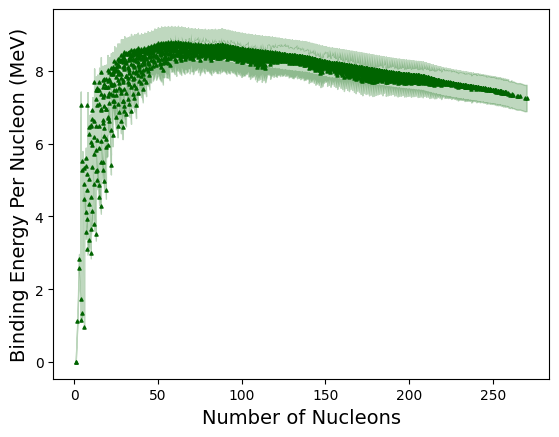

In [ ]:
BE_uncertainity = nuclear_data["BE"]*0.05

plt.scatter(A,BE,s=5, marker="^", color="darkgreen")
plt.xlabel("Number of Nucleons", fontsize=14)
plt.ylabel("Binding Energy Per Nucleon (MeV)", fontsize=14)

plt.fill_between(A.ravel(),BE - BE_uncertainity,
    BE+ BE_uncertainity, color="darkgreen", alpha=0.25)

Finally, when we have more than one thing plotted on a graph, we may want to add a legend. Here we may want to have a legend to tell the data set apart from the uncertainty bands. A legend is automatically generated using the [`legend`](https://matplotlib.org/stable/api/legend_api.html) function and the captions for the legend are passed to the [`scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) and [`fill_between`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.fill_between.html) functions using the `label` argument. When creating the legend in the code cell below, we use the `fontsize` argument to increase the size of the text in the legend and the `loc` argument to change the location of the legend. Since there is not data in the lower right corner of the graph, it makes sense for the legend to go there. If the `loc` argument is not passed, Matplotlib will attempt to find the "best" place of the legend to go, but this can sometimes end up obscuring some of the data.

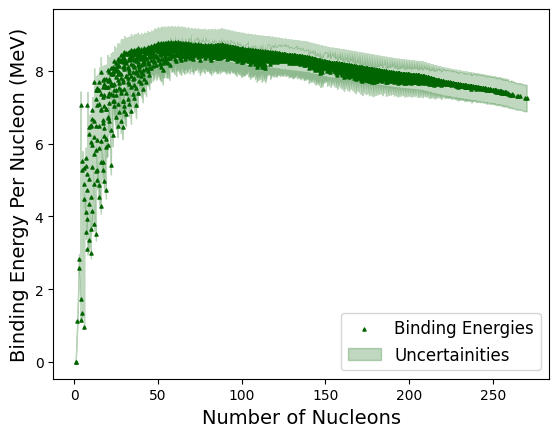

In [ ]:
BE_uncertainity = nuclear_data["BE"]*0.05

plt.scatter(A,BE,s=5, marker="^", color="darkgreen", label="Binding Energies")
plt.xlabel("Number of Nucleons", fontsize=14)
plt.ylabel("Binding Energy Per Nucleon (MeV)", fontsize=14)

plt.fill_between(A.ravel(),BE - BE_uncertainity,
    BE+ BE_uncertainity, color="darkgreen", alpha=0.25, label="Uncertainities")
plt.legend(fontsize=12, loc="lower right")

## Further Resources

If you are new to Python or need a refresher, the below resources may be of use:
* [A Whirlwind Tour of Python](https://jakevdp.github.io/WhirlwindTourOfPython/)
* [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/)
* [Plotting and Programming in Python](http://swcarpentry.github.io/python-novice-gapminder/)
* [Python for Scientific Computing](https://sbu-python-class.github.io/python-science/Introduction.html)

If you want to learn more about any of the libraries presented here, the websites for each library are a great place to start.

* [Pandas website](https://pandas.pydata.org)
* [Getting Started with Pandas](https://pandas.pydata.org/docs/getting_started/index.html)
* [Seaborn website](https://seaborn.pydata.org)
* [Seaborn Examples](https://seaborn.pydata.org/examples/index.html)
* [Seaborn User Guide and Tutorials](https://seaborn.pydata.org/tutorial.html)
* [Matplotlib website](https://matplotlib.org/stable/index.html)
* [Matplotlib Examples](https://matplotlib.org/stable/gallery/index.html)
* [Matplotlib Tutorials](https://matplotlib.org/stable/tutorials/index.html)

A histogram is a common type of graph used in some fields of physics, including especially particle physics.  There is a DSECOP module available for creating and analyzing data with histograms available [here](https://github.com/GDS-Education-Community-of-Practice/DSECOP/tree/main/Intro_to_Data_Processing_with_Histograms).